# MobileNetV2-Based ASPP Residual SE U-Net for Fetal Head Segmentation
## Training Notebook (Google Colab Compatible)

---

**Project:** Fetal Head Segmentation in Ultrasound Images using Deep Learning  
**Model:** Efficiency-Focused Architecture with Transfer Learning  
**Platform:** Google Colab with GPU acceleration (T4/A100/V100)  
**Dataset:** Large-Scale Fetal Ultrasound Dataset (3,792 annotated images)  
**Framework:** PyTorch 2.0+  

---

### 📋 Notebook Overview

This notebook implements a **complete training pipeline** for fetal head segmentation using an efficient U-Net variant optimized for medical imaging tasks. The model combines:

1. **Transfer Learning:** MobileNetV2 encoder pre-trained on ImageNet
2. **Multi-Scale Context:** ASPP (Atrous Spatial Pyramid Pooling) module
3. **Channel Attention:** Squeeze-and-Excitation (SE) blocks
4. **Residual Connections:** Improved gradient flow in decoder

---

### 📊 Dataset Information

**Source:** Large-Scale Annotation Dataset for Fetal Head Biometry  
**Zenodo Link:** https://zenodo.org/records/8265464  
**Citation:** van den Heuvel et al. (2018) - HC18 Challenge + Extended Annotations

**Dataset Composition:**
- **Total Images:** 3,792 annotated ultrasound frames
- **Training Set:** 2,648 images (69.8%)
- **Validation Set:** 568 images (15.0%)
- **Test Set:** 576 images (15.2%)

**Anatomical Planes (Multi-Plane Coverage):**
- **Trans-thalamic:** 1,557 images (41.0%) - Standard HC measurement plane
- **Diverse Fetal Head:** 999 images (26.3%) - HC18 Challenge dataset
- **Trans-cerebellum:** 681 images (18.0%) - Posterior fossa view
- **Trans-ventricular:** 555 images (14.6%) - Lateral ventricle view

**Image Characteristics:**
- **Format:** Grayscale ultrasound (PNG)
- **Resolution:** Variable (resized to 256×256 for training)
- **Pixel Size:** 0.09-0.33 mm (heterogeneous, real-world conditions)
- **Annotations:** Binary masks for fetal head boundary

**Dataset Advantages:**
- ✓ Large-scale: 3,792 images (3.8× larger than original HC18)
- ✓ Multi-plane: Covers 4 standard anatomical views
- ✓ Diverse: Multiple patients, imaging conditions, and gestational ages
- ✓ Clinically relevant: Includes both standard and challenging cases

---

### 🏗️ Architecture Overview

#### **Encoder Path (MobileNetV2 - Frozen, Pre-trained)**
- **Pre-training:** ImageNet classification (1.2M images, 1000 classes)
- **Feature Extraction:** 5 scales [H/2, H/4, H/8, H/16, H/32]
- **Channel Progression:** 16 → 24 → 32 → 96 → 1280
- **Efficiency:** Depthwise separable convolutions (lightweight)
- **Transfer Learning:** Frozen weights → ~70% parameters not trained
- **Custom Initial Conv:** Trainable 32-channel layer for full-resolution skip connection

#### **Bottleneck (ASPP Module)**
- **Output Channels:** 512
- **Multi-Scale Branches:**
  - 1×1 convolution (point-wise features)
  - 3×3 atrous convolutions with dilation rates [6, 12, 18]
  - Global average pooling (image-level context with GroupNorm)
- **Regularization:** Dropout (0.5) to prevent overfitting
- **Fusion:** Concatenate all branches → 1×1 conv projection to 512 channels

#### **Decoder Path (Trainable)**
- **5 Upsampling Blocks:** 512 → 256 → 128 → 64 → 32 → 32 filters
- **Upsampling Method:** ConvTranspose2d (2×2, stride=2) for learned upsampling
- **Skip Connections:** SE-enhanced encoder features concatenated with decoder
- **Each Block:** ResidualBlockSE (two 3×3 convs + skip connection + SE attention)

#### **Channel Attention (SE Blocks)**
- **Application Points:**
  - After every ResidualBlockSE in decoder
  - On skip connections before concatenation
- **Mechanism:** Squeeze (global pooling) → Excitation (FC-ReLU-FC-Sigmoid)
- **Reduction Ratio:** 16 (balances performance vs parameters)

#### **Output Layer**
- **Final Convolution:** 1×1 conv → single channel
- **No Activation:** Outputs raw logits (not probabilities)
- **Loss Compatibility:** BCEWithLogitsLoss applies sigmoid internally for numerical stability

---

### ✅ Key Advantages

**Efficiency:**
- ✓ MobileNetV2 uses depthwise separable convolutions (fewer parameters, faster inference)
- ✓ Frozen encoder reduces trainable parameters by ~70%
- ✓ Smaller memory footprint → can use larger batch sizes or higher resolution

**Effectiveness:**
- ✓ Transfer learning from ImageNet → better feature extraction
- ✓ ASPP captures multi-scale context → handles various fetal head sizes
- ✓ SE blocks enhance informative channels → improves segmentation quality
- ✓ Residual connections → easier optimization and gradient flow

**Stability:**
- ✓ Raw logits output prevents double sigmoid application
- ✓ BCEWithLogitsLoss combines sigmoid + BCE in one numerically stable operation
- ✓ DiceBCEWithLogitsLoss auto-computes `pos_weight` for class balance

---

### 🎯 Training Configuration

**Loss Function:** DiceBCEWithLogitsLoss (80% Dice + 20% BCE)  
**Optimizer:** Adam (lr=3e-4, weight_decay=1e-4)  
**Scheduler:** ReduceLROnPlateau (factor=0.5, patience=10)  
**Epochs:** 50-100 with early stopping (patience=15)  
**Batch Size:** 8-16 (depending on GPU memory)  
**Augmentation:** HorizontalFlip, VerticalFlip, Rotation (±20°), ShiftScaleRotate (±10%)  

---

### 📊 Notebook Structure

1. **Environment Setup** - Clone repository, install dependencies, verify GPU
2. **Configuration Loading** - Load YAML config and adjust paths for Colab
3. **Model Initialization** - Instantiate architecture, count parameters
4. **Loss & Optimizer** - Configure training components
5. **Data Loading** - Create datasets with augmentation pipeline
6. **Data Verification** - Validate preprocessing before training
7. **Training Functions** - Define train/validate logic
8. **Training Loop** - Execute full training with checkpointing
9. **Visualization** - Plot training curves and metrics
10. **Evaluation** - Test best model and generate predictions
11. **Download Results** - Export trained model and visualizations
12. **Summary** - Review performance and next steps

---

### ⏱️ Estimated Training Time

- **Google Colab T4 GPU (Free Tier):** 3-5 hours for 100 epochs
- **Google Colab A100 GPU (Colab Pro):** 1-2 hours for 100 epochs
- **V100 GPU:** 1.5-3 hours for 100 epochs

**Note:** Actual time depends on dataset size, batch size, and early stopping

---

### 📚 References

**Model Architecture:**
- **MobileNetV2:** [Sandler et al., 2018](https://arxiv.org/abs/1801.04381)
- **ASPP (DeepLabv3):** [Chen et al., 2017](https://arxiv.org/abs/1706.05587)
- **Squeeze-and-Excitation Networks:** [Hu et al., 2018](https://arxiv.org/abs/1709.01507)
- **U-Net:** [Ronneberger et al., 2015](https://arxiv.org/abs/1505.04597)

**Dataset:**
- **HC18 Challenge:** [van den Heuvel et al., 2018](https://hc18.grand-challenge.org/)
- **Large-Scale Dataset:** [Zenodo Repository](https://zenodo.org/records/8265464)

---

**Let's begin! Run the cells sequentially from top to bottom.** ⬇️

## 1. Environment Setup

### Google Colab Configuration

This notebook is designed to run on **Google Colab** with GPU acceleration for efficient training.

**Repository Information:**
- **GitHub Repository:** `https://github.com/TrinhThaiSonDHQT/Fetal-Head-Segmentation`
- **Clone Method:** HTTPS (no authentication required)

**Directory Structure:**
```
/content/
├── Fetal-Head-Segmentation/          # Cloned repository (project root)
│   ├── efficient_focus/              # Efficiency-focused models
│   ├── shared/                       # Shared utilities and datasets
│   └── ...
└── outputs/                          # Training outputs (not in repo)
    └── results/
        ├── checkpoints/              # Model weights (.pth files)
        ├── logs/                     # Training curves and metrics
        ├── predictions/              # Sample prediction visualizations
        └── visualizations/           # Additional analysis plots
```

**Setup Steps:**
1. **Clone Repository:** Download project from GitHub to `/content/Fetal-Head-Segmentation/`
2. **Install Dependencies:** Install Albumentations 1.3.1 (PyTorch, NumPy, OpenCV pre-installed)
3. **Configure Paths:** Set up project root and output directories
4. **Import Modules:** Load model, dataset, and training utilities
5. **Verify CUDA:** Ensure GPU acceleration is available

**Important Notes:**
- Output directory (`/content/outputs/`) is stored in Colab's temporary runtime
- Download results before runtime disconnects (12-hour limit on free tier)
- GPU recommended: T4 (free tier) or A100/V100 (Colab Pro)
- Expected training time: 2-4 hours on T4 GPU

In [ ]:
# Clone the GitHub repository
import os

# Check if already cloned
if not os.path.exists('/content/Fetal-Head-Segmentation'):
    print("Cloning repository from GitHub...")
    !git clone https://github.com/TrinhThaiSonDHQT/Fetal-Head-Segmentation.git
    print("✓ Repository cloned successfully")
else:
    print("✓ Repository already exists")

Cloning repository from GitHub...
Cloning into 'Fetal-Head-Segmentation'...
remote: Enumerating objects: 12630, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 12630 (delta 24), reused 45 (delta 18), pack-reused 12561 (from 1)
Receiving objects: 100% (12630/12630), 1.20 GiB | 39.48 MiB/s, done.
Resolving deltas: 100% (496/496), done.
Updating files: 100% (15226/15226), done.
✓ Repository cloned successfully


In [ ]:
import os
import sys
from pathlib import Path

print("[Google Colab Setup]")

# Setup paths for Google Colab
project_root = Path('/content/Fetal-Head-Segmentation')
output_root = Path('/content/outputs')

# Verify project exists
if not project_root.exists():
    raise RuntimeError(
        f"Project not found at {project_root}\n"
        f"Please run the previous cell to clone the repository from GitHub."
    )

if not (project_root / 'src').exists():
    raise RuntimeError(
        f"'src' folder not found in {project_root}\n"
        f"Please ensure the repository was cloned correctly."
    )

print(f"Project root: {project_root}")
print(f"Output root: {output_root}")

# Add project to path
sys.path.insert(0, str(project_root))

print(f"\n✓ Environment setup complete")

[Google Colab Setup]
Project root: /content/Fetal-Head-Segmentation
Output root: /content/outputs

✓ Environment setup complete


In [ ]:
# Install required packages for Google Colab
print("Installing required packages...")

# Colab has most packages pre-installed (PyTorch, NumPy, Matplotlib, OpenCV)
# Pin Albumentations to 1.3.1 for compatibility with both Colab and Kaggle
!pip install -q albumentations==1.3.1

print("\n✓ Packages installed successfully")

Installing required packages...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.7/125.7 kB 7.2 MB/s eta 0:00:00

✓ Packages installed successfully


In [ ]:
import yaml
import torch
import torch.optim as optim
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

# Import from src directory
from src.losses import DiceBCEWithLogitsLoss
from src.models.variants.mobinet_aspp_residual_se.mobinet_aspp_residual_se import MobileNetV2ASPPResidualSEUNet, count_parameters
from src.data.dataset_v2 import LargeScaleDataset
from src.metrics.segmentation_metrics import dice_coefficient, iou_score, pixel_accuracy
from src.utils.visualization import save_prediction_grid, visualize_sample
from src.utils.transforms import get_transforms

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

print(f"\nPyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA device: {torch.cuda.get_device_name(0)}")


PyTorch version: 2.9.0+cu126
CUDA available: True
CUDA device: Tesla T4


## 2. Configuration Loading

### YAML Configuration File

This notebook uses a centralized YAML configuration file for reproducible experiments:

**Configuration File:** `efficient_focus/configs/mobinet_aspp_residual_se_config_v2.yaml`

**Key Configuration Sections:**

1. **Model Architecture:**
   - Pre-trained MobileNetV2 encoder (ImageNet weights)
   - Encoder freeze status (reduces trainable parameters)
   - SE block reduction ratio (channel attention strength)
   - ASPP module parameters (atrous rates, dropout, normalization)

2. **Training Hyperparameters:**
   - Optimizer settings (Adam with learning rate, weight decay)
   - Learning rate scheduler (ReduceLROnPlateau parameters)
   - Batch size and number of epochs
   - Early stopping patience

3. **Loss Function:**
   - DiceBCEWithLogitsLoss weights (Dice vs BCE ratio)
   - Auto-weighting for class imbalance handling
   - Numerical stability parameters

4. **Dataset Paths:**
   - Training, validation, and test set directories
   - Automatic path resolution (relative to project root)

5. **Logging Configuration:**
   - Checkpoint directory (model weights)
   - Log directory (training curves)
   - Prediction/visualization directories

**Path Adjustment for Google Colab:**
- Original paths in YAML are relative to project root
- This cell adjusts output paths to `/content/outputs/results/`
- Ensures outputs are stored in Colab's workspace (not in cloned repo)

**Benefits of YAML Configuration:**
- ✓ Centralized hyperparameter management
- ✓ Easy experiment tracking and reproducibility
- ✓ No hardcoded values in notebook cells
- ✓ Version control friendly (track config changes)

In [ ]:
# Load configuration for MobileNetV2-Based ASPP Residual SE U-Net
config_path = project_root / 'configs' / 'mobinet_aspp_residual_se_config.yaml'

with open(config_path, 'r') as f:
    config = yaml.safe_load(f)

# Adjust output paths for Google Colab environment
print(f"Adjusting paths for Google Colab environment...")
config['logging']['checkpoint_dir'] = str(output_root / 'results' / 'checkpoints')
config['logging']['log_dir'] = str(output_root / 'results' / 'logs')
config['logging']['prediction_dir'] = str(output_root / 'results' / 'predictions')
config['logging']['visualization_dir'] = str(output_root / 'results' / 'visualizations')

print(f"  Outputs will be saved to: {output_root / 'results'}")
print("\nConfiguration loaded:")
print(f"  Model: {config['model']['name']}")
print(f"  Pre-trained: {config['model']['pretrained']}")
print(f"  Freeze Encoder: {config['model']['freeze_encoder']}")
print(f"  SE Reduction Ratio: {config['model']['reduction_ratio']}")
print(f"  ASPP Atrous Rates: {config['model']['atrous_rates']}")
print(f"  ASPP Dropout: {config['model']['aspp_dropout']}")
print(f"  ASPP Use GroupNorm: {config['model']['aspp_use_groupnorm']}")

print(f"  Learning Rate: {config['training']['optimizer']['lr']}")print(f"  Epochs: {config['training']['num_epochs']}")

print(f"  Weight Decay: {config['training']['optimizer']['weight_decay']}")print(f"  Batch Size: {config['training']['batch_size']}")
print(f"  Loss Function: {config['loss']['name']}")

Adjusting paths for Google Colab environment...
  Outputs will be saved to: /content/outputs/results

Configuration loaded:
  Model: MobileNetV2ASPPResidualSEUNet
  Pre-trained: True
  Freeze Encoder: True
  SE Reduction Ratio: 16
  ASPP Atrous Rates: [6, 12, 18]
  ASPP Dropout: 0.5
  ASPP Use GroupNorm: True
  Learning Rate: 0.0003
  Weight Decay: 0.0001
  Loss Function: DiceBCELoss
  Batch Size: 16
  Epochs: 100


## 3. Model Initialization

### MobileNetV2-Based ASPP Residual SE U-Net Architecture Details

**Encoder Path (MobileNetV2 - Frozen, Pre-trained):**
- Pre-trained on ImageNet for transfer learning
- Feature extraction at 5 scales: [H/2, H/4, H/8, H/16, H/32]
- Channel progression: 16 → 24 → 32 → 96 → 1280
- Depthwise separable convolutions (efficient)
- **Frozen weights** → ~70% of parameters not trained
- Custom initial conv (trainable) for full-resolution skip connection (32 channels)

**Bottleneck (ASPP Module):**
- Multi-scale feature extraction, output: 512 channels
- **1×1 convolution**: Point-wise features
- **3×3 atrous convolutions**: Dilation rates [6, 12, 18] for multi-scale context
- **Global Average Pooling**: Image-level features with GroupNorm
- **Dropout (0.5)**: Regularization to prevent overfitting
- **Fusion**: Concatenate all branches and project to 512 channels

**Decoder Path (Trainable):**
- 5 upsampling blocks: 512 → 256 → 128 → 64 → 32 → 32 filters
- Upsampling: ConvTranspose2d (2×2, stride=2)
- Skip connections: SE-enhanced encoder features concatenated with decoder
- Each block: ResidualBlockSE after concatenation

**Channel Attention (SE Blocks):**
- Applied after every ResidualBlockSE in decoder
- Applied to skip connections before concatenation
- Squeeze: Global average pooling
- Excitation: FC → ReLU → FC → Sigmoid
- Reduction ratio: 16 (balances performance vs. parameters)

**Output Layer:**
- Conv2d (1×1) to single channel
- **No sigmoid activation** → outputs raw logits
- Sigmoid applied by loss function (BCEWithLogitsLoss) for numerical stability

**Key Advantages:**
- ✓ **Efficient**: MobileNetV2 uses depthwise separable convolutions
- ✓ **Transfer Learning**: Pre-trained weights from ImageNet
- ✓ **Fast Training**: Frozen encoder reduces trainable parameters by ~70%
- ✓ **Less Memory**: Can use larger batch sizes or higher resolution images
- ✓ **Multi-scale Context**: ASPP captures features at multiple scales
- ✓ **Channel Attention**: SE blocks enhance feature representation
- ✓ **Numerically Stable**: Raw logits prevent double sigmoid application

In [6]:
# Set device
device = torch.device(config['device'] if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Initialize MobileNetV2-Based ASPP Residual SE U-Net
model = MobileNetV2ASPPResidualSEUNet(
    in_channels=config['model']['in_channels'],
    out_channels=config['model']['out_channels'],
    pretrained=config['model']['pretrained'],
    freeze_encoder=config['model']['freeze_encoder'],
    reduction_ratio=config['model']['reduction_ratio'],
    atrous_rates=config['model']['atrous_rates'],
    aspp_dropout=config['model']['aspp_dropout'],
    aspp_use_groupnorm=config['model']['aspp_use_groupnorm']
)

model = model.to(device)

# Count parameters
total_params, trainable_params, frozen_params = count_parameters(model)

# Model summary
print(f"\nMobileNetV2-Based ASPP Residual SE U-Net Architecture:")
print(f"  Total parameters: {total_params:,}")
print(f"  Trainable parameters: {trainable_params:,} ({100 * trainable_params / total_params:.1f}%)")
print(f"  Frozen parameters: {frozen_params:,} ({100 * frozen_params / total_params:.1f}%)")
print(f"  Total model size: ~{total_params * 4 / (1024**2):.2f} MB (float32)")
print(f"  Trainable size: ~{trainable_params * 4 / (1024**2):.2f} MB (float32)")
print(f"\nModel Configuration:")
print(f"  Input channels: {config['model']['in_channels']}")
print(f"  Output channels: {config['model']['out_channels']}")
print(f"  Pre-trained encoder: {config['model']['pretrained']}")
print(f"  Freeze encoder: {config['model']['freeze_encoder']}")
print(f"  SE reduction ratio: {config['model']['reduction_ratio']}")
print(f"  ASPP atrous rates: {config['model']['atrous_rates']}")
print(f"  ASPP dropout: {config['model']['aspp_dropout']}")
print(f"  ASPP use GroupNorm: {config['model']['aspp_use_groupnorm']}")

Using device: cuda
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


100%|██████████| 13.6M/13.6M [00:00<00:00, 116MB/s]



MobileNetV2-Based ASPP Residual SE U-Net Architecture:
  Total parameters: 25,253,893
  Trainable parameters: 23,030,597 (91.2%)
  Frozen parameters: 2,223,296 (8.8%)
  Total model size: ~96.34 MB (float32)
  Trainable size: ~87.85 MB (float32)

Model Configuration:
  Input channels: 1
  Output channels: 1
  Pre-trained encoder: True
  Freeze encoder: True
  SE reduction ratio: 16
  ASPP atrous rates: [6, 12, 18]
  ASPP dropout: 0.5
  ASPP use GroupNorm: True


## 4. Loss Function and Optimizer

### Loss Function: DiceBCEWithLogitsLoss (Hybrid Loss)

A weighted combination of **Dice Loss** and **BCEWithLogits Loss**.

**Dice Loss (80%):** Optimizes region overlap
  - Directly optimizes the Dice coefficient metric
  - Effective for imbalanced segmentation (small target regions)
  - Handles class imbalance naturally

**BCEWithLogits Loss (20%):** Optimizes pixel-wise classification
  - Numerically stable (combines sigmoid + BCE in one operation)
  - Handles boundary refinement
  - Auto-computes `pos_weight` from data to balance classes

**Key Features:**
- Expects **logits** (raw values before sigmoid) as input
- Auto-computes `pos_weight` from first batch for class balance
- Smooth parameter (1e-6) for numerical stability in Dice calculation

### Optimizer: Adam
- Adaptive learning rate per parameter
- Learning rate: 3e-4 (higher for faster decoder training, encoder frozen)
- Weight decay: 1e-4 (L2 regularization to prevent decoder overfitting)

### Learning Rate Scheduler: ReduceLROnPlateau
- Monitors validation Dice coefficient (mode='max')
- Reduces LR by factor of 0.5 when validation plateaus
- Patience: 10 epochs
- Minimum LR: 1e-6
- Helps fine-tune convergence and escape local minima

In [7]:
loss_config = config['loss']
dice_weight_config = loss_config.get('dice_weight', 0.8)
bce_weight_config = loss_config.get('bce_weight', 0.2)
smooth_config = loss_config.get('smooth', 1.0e-6)
pos_weight_config = loss_config.get('pos_weight', None)
auto_weight_config = loss_config.get('auto_weight', True)

# Use DiceBCEWithLogitsLoss
criterion = DiceBCEWithLogitsLoss(
    dice_weight=dice_weight_config,
    bce_weight=bce_weight_config,
    pos_weight=pos_weight_config,
    auto_weight=auto_weight_config,
    smooth=smooth_config
)

print(f"Loss Function: DiceBCELoss")
print(f"  Dice weight: {dice_weight_config}")
print(f"  BCE weight: {bce_weight_config}")
print(f"  Smooth parameter: {smooth_config}")

# Optimizer (Adam)
optimizer_config = config['training']['optimizer']
optimizer = optim.Adam(
    model.parameters(),
    lr=optimizer_config['lr'],
    betas=tuple(optimizer_config['betas']),
    eps=optimizer_config['eps'],
    weight_decay=optimizer_config['weight_decay']
)
print(f"\nOptimizer: Adam")
print(f"  Learning rate: {optimizer_config['lr']}")
print(f"  Weight decay: {optimizer_config['weight_decay']}")

# Learning rate scheduler
scheduler_config = config['training']['scheduler']
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode=scheduler_config['mode'],
    factor=scheduler_config['factor'],
    patience=scheduler_config['patience'],
    min_lr=scheduler_config['min_lr']
)
print(f"\nScheduler: ReduceLROnPlateau")
print(f"  Mode: {scheduler_config['mode']}")
print(f"  Factor: {scheduler_config['factor']}")
print(f"  Patience: {scheduler_config['patience']}")
print(f"  Min LR: {scheduler_config['min_lr']}")

Loss Function: DiceBCELoss
  Dice weight: 0.8
  BCE weight: 0.2
  Smooth parameter: 1e-06

Optimizer: Adam
  Learning rate: 0.0003
  Weight decay: 0.0001

Scheduler: ReduceLROnPlateau
  Mode: max
  Factor: 0.5
  Patience: 10
  Min LR: 1e-06


## 5. Data Loading and Augmentation

### Preprocessing Pipeline (All Images)

Applied consistently to training, validation, and test sets:
1. **Normalization:** Divide pixel values by 255.0 → [0, 1] range
2. **Resizing:** 256×256 pixels (maintains aspect ratio consistency)
3. **Tensor Conversion:** NumPy array → PyTorch tensor (C×H×W format)

### Data Augmentation (Training Only)

**On-the-fly augmentation** using Albumentations library:
- **HorizontalFlip:** p=0.5 (mirrors left-right)
- **VerticalFlip:** p=0.5 (mirrors top-bottom)
- **Rotation:** ±20° with p=0.5 (handles probe orientation variations)
- **ShiftScaleRotate:** p=0.5
  - Translation: ±10% (handles positioning variations)
  - Scaling: ±10% (handles zoom variations)

**Benefits:**
- Augmentation applied **per epoch** → different samples each time
- Improves model generalization and robustness
- Prevents overfitting on small datasets
- Image-mask transforms synchronized automatically

**Validation/Test:**
- **No augmentation** applied
- Only preprocessing (normalize, resize, tensorize)
- Ensures consistent evaluation metrics

In [ ]:
data_config = config['data']
training_config = config['training']

# Helper to build paths
def get_path(config_path):
    """Helper to handle both absolute and relative paths"""
    p = Path(config_path)
    if p.is_absolute():
        return str(p)
    else:
        return str(project_root / config_path)

# Create augmentation transforms
print("Creating augmentation transforms...")
train_transform = get_transforms(height=256, width=256, is_train=True)
val_transform = get_transforms(height=256, width=256, is_train=False)
print("  Train transform: WITH augmentation (HorizontalFlip, VerticalFlip, Rotation, ShiftScaleRotate)")
print("  Val transform: WITHOUT augmentation (resize + normalize only)")

# Create datasets - using LargeScaleDataset for on-the-fly augmentation
print("\nCreating training dataset...")
train_dataset = LargeScaleDataset(
    image_dir=get_path(data_config['train_images']),
    mask_dir=get_path(data_config['train_masks']),
    transform=train_transform
)

print("Creating validation dataset...")
val_dataset = LargeScaleDataset(
    image_dir=get_path(data_config['val_images']),
    mask_dir=get_path(data_config['val_masks']),
    transform=val_transform
)

print("Creating test dataset...")
test_dataset = LargeScaleDataset(
    image_dir=get_path(data_config['test_images']),
    mask_dir=get_path(data_config['test_masks']),
    transform=val_transform
)

# Use num_workers=0 for Google Colab to avoid multiprocessing issues
num_workers = 0
print(f"\nDataLoader settings:")
print(f"  num_workers: {num_workers} (disabled for Google Colab)")
print(f"  Batch size: {training_config['batch_size']}")

# Data loaders
train_loader = DataLoader(
    train_dataset,
    batch_size=training_config['batch_size'],
    shuffle=True,
    num_workers=num_workers,
    pin_memory=training_config['pin_memory']
)

val_loader = DataLoader(
    val_dataset,
    batch_size=training_config['batch_size'],
    shuffle=False,
    num_workers=num_workers,
    pin_memory=training_config['pin_memory']
)

test_loader = DataLoader(
    test_dataset,
    batch_size=training_config['batch_size'],
    shuffle=False,
    num_workers=num_workers,
    pin_memory=training_config['pin_memory']
)

print(f"\n{'='*60}")
print(f"Datasets Ready:")
print(f"{'='*60}")
print(f"  Train samples: {len(train_dataset)}")
print(f"  Validation samples: {len(val_dataset)}")
print(f"  Test samples: {len(test_dataset)}")
print(f"  Batch size: {training_config['batch_size']}")
print(f"  Train batches: {len(train_loader)}")
print(f"  Val batches: {len(val_loader)}")
print(f"  Test batches: {len(test_loader)}")
print(f"  Train augmentation: ENABLED (on-the-fly)")
print(f"  Val/Test augmentation: DISABLED")
print(f"{'='*60}\n")

Creating augmentation transforms...
  Train transform: WITH augmentation (HorizontalFlip, VerticalFlip, Rotation, ShiftScaleRotate)
  Val transform: WITHOUT augmentation (resize + normalize only)

Creating training dataset...
Loaded 2642 image-mask pairs from /content/Fetal-Head-Segmentation/shared/dataset/training_set/images
Creating validation dataset...
Loaded 583 image-mask pairs from /content/Fetal-Head-Segmentation/shared/dataset/validation_set/images
Creating test dataset...
Loaded 567 image-mask pairs from /content/Fetal-Head-Segmentation/shared/dataset/test_set/images

DataLoader settings:
  num_workers: 0 (disabled for Google Colab)
  Batch size: 16

Datasets Ready:
  Train samples: 2642
  Validation samples: 583
  Test samples: 567
  Batch size: 16
  Train batches: 166
  Val batches: 37
  Test batches: 36
  Train augmentation: ENABLED (on-the-fly)
  Val/Test augmentation: DISABLED



## 6. Data Quality Verification

### Pre-Training Data Validation

**Critical checks before training to prevent silent failures:**

1. **Tensor Shape Verification:**
   - Images: `[B, 1, 256, 256]` (batch, grayscale, height, width)
   - Masks: `[B, 1, 256, 256]` (same dimensions as images)

2. **Value Range Checks:**
   - Images: Should be in `[0, 1]` after normalization
   - Masks: **Must be binary {0, 1}** (not {0, 255})

3. **Mask Statistics:**
   - Unique values: Should only contain `{0, 1}`
   - Foreground ratio: Typically 2-10% for fetal head segmentation
   - Too low (<1%): Possible mask preprocessing error
   - Too high (>30%): Possible incorrect mask or target

4. **Visual Inspection:**
   - Display one sample from training batch
   - Verify image-mask alignment
   - Check for obvious augmentation artifacts

**Why This Matters:**
- ⚠️ Masks in `{0, 255}` instead of `{0, 1}` → training divergence
- ⚠️ Unnormalized images → gradient explosion
- ⚠️ Misaligned image-mask pairs → model learns incorrect associations
- ⚠️ Extreme foreground ratios → potential data pipeline bugs

**Expected Output:**
- ✓ Masks are binary {0, 1}
- ✓ Foreground ratio is reasonable (2-10%)
- ✓ Visual sample shows proper image-mask correspondence

Sample batch:
  Images shape: torch.Size([16, 1, 256, 256])
  Masks shape: torch.Size([16, 1, 256, 256])
  Image range: [0.0000, 1.0000]
  Mask range: [0.0000, 1.0000]
  Mask unique values: tensor([0., 1.])
  Mask mean (% foreground): 0.3492

✓ Masks are properly binary {0, 1}
⚠️  WARNING: Unusual foreground ratio: 34.92% (expected 2-10%)


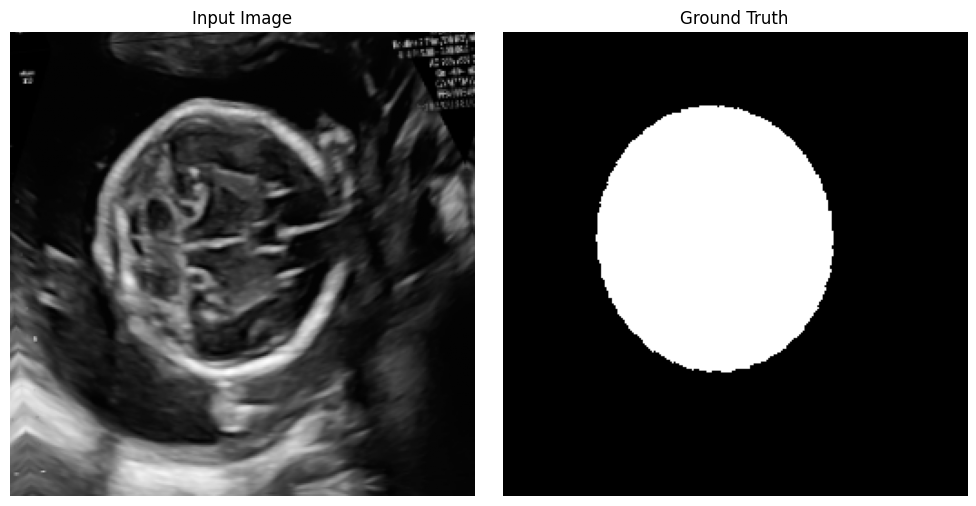

In [9]:
# Get a batch of training data
sample_images, sample_masks = next(iter(train_loader))

print(f"Sample batch:")
print(f"  Images shape: {sample_images.shape}")
print(f"  Masks shape: {sample_masks.shape}")
print(f"  Image range: [{sample_images.min():.4f}, {sample_images.max():.4f}]")
print(f"  Mask range: [{sample_masks.min():.4f}, {sample_masks.max():.4f}]")
print(f"  Mask unique values: {torch.unique(sample_masks)}")
print(f"  Mask mean (% foreground): {sample_masks.mean():.4f}")

# CRITICAL CHECK: Ensure masks are binary {0, 1}
if not torch.all((sample_masks == 0) | (sample_masks == 1)):
    print("\n⚠️  WARNING: Masks are not binary! Check preprocessing.")
else:
    print("\n✓ Masks are properly binary {0, 1}")

# Check if masks have reasonable foreground ratio (2-10% typical for fetal head)
fg_ratio = sample_masks.mean().item()
if fg_ratio < 0.01 or fg_ratio > 0.3:
    print(f"⚠️  WARNING: Unusual foreground ratio: {fg_ratio:.2%} (expected 2-10%)")
else:
    print(f"✓ Foreground ratio looks reasonable: {fg_ratio:.2%}")

# Visualize first sample
visualize_sample(sample_images[0], sample_masks[0])

## 7. Training and Validation Functions

### Core Training Components

#### `train_one_epoch()`
**Purpose:** Execute one complete pass through the training dataset

**Workflow:**
1. Set model to training mode (`model.train()`)
   - Enables dropout layers
   - Updates BatchNorm statistics
2. Iterate through training batches
3. For each batch:
   - Move data to GPU (`images.to(device)`)
   - Forward pass: `logits = model(images)`
   - Compute loss: `loss = criterion(logits, masks)`
   - Backward pass: `loss.backward()`
   - Update weights: `optimizer.step()`
4. Return average epoch loss

**Key Details:**
- Model outputs **raw logits** (no sigmoid)
- Loss function expects logits (BCEWithLogitsLoss)
- Progress bar shows real-time loss

---

#### `validate()`
**Purpose:** Evaluate model on validation set without updating weights

**Workflow:**
1. Set model to evaluation mode (`model.eval()`)
   - Disables dropout layers
   - Freezes BatchNorm statistics
2. Disable gradient computation (`with torch.no_grad()`)
3. For each validation batch:
   - Forward pass: `logits = model(images)`
   - Compute loss: `loss = criterion(logits, masks)`
   - Convert logits to predictions:
     - Apply sigmoid: `probs = torch.sigmoid(logits)`
     - Threshold: `preds = (probs > 0.5).float()`
   - Calculate metrics per sample:
     - **Dice Coefficient:** Region overlap metric
     - **IoU (Intersection over Union):** Segmentation accuracy
     - **Pixel Accuracy:** Correct pixel classification rate
4. Return average metrics across all validation samples

**Important Notes:**
- Validation uses same loss function as training (for monitoring)
- Metrics computed on **binary predictions** (after sigmoid + threshold)
- No weight updates during validation (read-only mode)
- Used for model selection (save best based on Dice coefficient)

In [10]:
print("="*80)
print("MODEL-LOSS COMPATIBILITY VERIFICATION")
print("="*80)

# Test with a small batch
sample_images, sample_masks = next(iter(train_loader))
sample_images = sample_images.to(device)
sample_masks = sample_masks.to(device)

# Forward pass
with torch.no_grad():
    model_outputs = model(sample_images)

print(f"\n1. Model Output Analysis:")
print(f"   Shape: {model_outputs.shape}")
print(f"   Range: [{model_outputs.min().item():.4f}, {model_outputs.max().item():.4f}]")
print(f"   Mean: {model_outputs.mean().item():.4f}")
print(f"   Std: {model_outputs.std().item():.4f}")

# Check if outputs are logits (should have negative values and values > 1)
has_negative = (model_outputs < 0).any().item()
has_large_positive = (model_outputs > 1).any().item()

if has_negative or has_large_positive:
    print(f"   ✓ Outputs are LOGITS (raw values before sigmoid)")
    print(f"     - Has negative values: {has_negative}")
    print(f"     - Has values > 1: {has_large_positive}")
else:
    print(f"   ⚠️  WARNING: Outputs look like probabilities [0,1], not logits!")
    print(f"     - Model may have sigmoid in output layer")

print(f"\n2. Loss Function Test:")
loss_value = criterion(model_outputs, sample_masks)
print(f"   Loss value: {loss_value.item():.6f}")
print(f"   ✓ Loss computed successfully")

print(f"\n3. Validation Metrics Test:")
# Apply sigmoid to get probabilities for metrics
probs = torch.sigmoid(model_outputs)
preds = (probs > 0.5).float()

print(f"   Probabilities after sigmoid:")
print(f"     Range: [{probs.min().item():.4f}, {probs.max().item():.4f}]")
print(f"     Mean: {probs.mean().item():.4f}")

dice = dice_coefficient(preds[0], sample_masks[0]).item()
iou = iou_score(preds[0], sample_masks[0]).item()
pa = pixel_accuracy(preds[0], sample_masks[0])

print(f"   Sample metrics (before training):")
print(f"     Dice: {dice:.4f}")
print(f"     IoU: {iou:.4f}")
print(f"     PA: {pa:.4f}")

print(f"\n{'='*80}")
print(f"✓ ALL CHECKS PASSED - Model and loss are compatible!")
print(f"{'='*80}\n")

MODEL-LOSS COMPATIBILITY VERIFICATION

1. Model Output Analysis:
   Shape: torch.Size([16, 1, 256, 256])
   Range: [-5.0892, 8.1658]
   Mean: 0.1885
   Std: 0.4829
   ✓ Outputs are LOGITS (raw values before sigmoid)
     - Has negative values: True
     - Has values > 1: True

2. Loss Function Test:
[BCEWithLogitsBalancedLoss] Auto-computed pos_weight: 1.63
  Foreground ratio: 38.0268%
  This gives 1.6x more weight to foreground pixels
   Loss value: 0.622779
   ✓ Loss computed successfully

3. Validation Metrics Test:
   Probabilities after sigmoid:
     Range: [0.0061, 0.9997]
     Mean: 0.5441
   Sample metrics (before training):
     Dice: 0.5564
     IoU: 0.3854
     PA: 0.4653

✓ ALL CHECKS PASSED - Model and loss are compatible!



In [ ]:
def train_one_epoch(model, dataloader, criterion, optimizer, device, epoch):
    """
    Train for one epoch
    """
    model.train()
    running_loss = 0.0

    pbar = tqdm(dataloader, desc=f"Epoch {epoch+1} [Train]", leave=False)
    for images, masks in pbar:
        images = images.to(device)
        masks = masks.to(device)

        # Forward pass
        optimizer.zero_grad()
        logits = model(images)  # Model outputs raw logits

        # Calculate loss (DiceBCEWithLogitsLoss expects logits)
        loss = criterion(logits, masks)

        # Backward pass
        loss.backward()
        optimizer.step()

        # Update statistics
        running_loss += loss.item()
        pbar.set_postfix({'loss': f"{loss.item():.4f}"})

    epoch_loss = running_loss / len(dataloader)
    return epoch_loss


def validate(model, dataloader, criterion, device, epoch):
    """
    Validate the model
    """
    model.eval()
    running_loss = 0.0
    dice_scores = []
    iou_scores = []
    pa_scores = []

    with torch.no_grad():
        pbar = tqdm(dataloader, desc=f"Epoch {epoch+1} [Val]", leave=False)
        for images, masks in pbar:
            images = images.to(device)
            masks = masks.to(device)

            # Forward pass
            logits = model(images)  # Model outputs raw logits

            # Calculate loss (DiceBCEWithLogitsLoss expects logits)
            loss = criterion(logits, masks)
            running_loss += loss.item()

            # Calculate metrics
            # Apply sigmoid to convert logits to probabilities [0, 1]
            probs = torch.sigmoid(logits)
            preds = (probs > 0.5).float()

            for i in range(images.size(0)):
                dice = dice_coefficient(preds[i], masks[i])
                iou = iou_score(preds[i], masks[i])
                pa = pixel_accuracy(preds[i], masks[i])

                dice_scores.append(dice.item())
                iou_scores.append(iou.item())
                pa_scores.append(pa.item())

            pbar.set_postfix({
                'loss': f"{loss.item():.4f}",
                'dice': f"{np.mean(dice_scores):.4f}"
            })

    # Calculate average metrics
    val_loss = running_loss / len(dataloader)
    val_dice = np.mean(dice_scores)
    val_iou = np.mean(iou_scores)
    val_pa = np.mean(pa_scores)

    return val_loss, val_dice, val_iou, val_pa


print("Training functions defined!")

Training functions defined!


## 8. Training Loop

### Complete Training Pipeline with Monitoring and Checkpointing

#### Training Configuration

**Primary Hyperparameters:**
- **Number of Epochs:** Configurable (typically 50-100)
- **Early Stopping Patience:** Stop if no validation improvement for N epochs
- **Metric for Best Model:** Dice coefficient (primary segmentation metric)
- **Checkpoint Strategy:** Save only the best model (highest validation Dice)

---

#### Per-Epoch Workflow

1. **Training Phase:**
   - Execute `train_one_epoch()` on entire training set
   - Model weights updated via backpropagation
   - Returns average training loss

2. **Validation Phase:**
   - Execute `validate()` on validation set
   - No weight updates (evaluation only)
   - Returns: validation loss, Dice, IoU, pixel accuracy

3. **Learning Rate Adjustment:**
   - `ReduceLROnPlateau` monitors validation Dice
   - Reduces LR by factor of 0.5 if no improvement for 10 epochs
   - Helps escape local minima and fine-tune convergence

4. **History Logging:**
   - Track all metrics per epoch for visualization
   - Stored in `history` dictionary: losses, metrics, learning rate

5. **Model Checkpointing:**
   - Save complete checkpoint if validation Dice improves:
     - Model weights (`model_state_dict`)
     - Optimizer state (`optimizer_state_dict`)
     - Scheduler state (`scheduler_state_dict`)
     - Best Dice score and full training history
     - Original configuration (for reproducibility)
   - Only one checkpoint saved (overwrites previous best)

6. **Early Stopping Check:**
   - Count consecutive epochs without improvement
   - Stop training if patience limit reached
   - Prevents overfitting and saves compute time

---

#### Console Output

**Epoch Summary Display:**
- Training loss (current epoch)
- Validation loss, Dice, IoU, pixel accuracy
- 🏆 indicator when new best Dice achieved
- ⬇️ indicator when learning rate reduced
- ⚠️ warning with early stopping countdown

**Final Summary:**
- Best achieved Dice coefficient
- Best IoU and pixel accuracy
- Total training time

---

#### Training Monitoring Tips

**Good Training Signs:**
- Training loss decreases steadily
- Validation Dice increases and plateaus
- Small gap between train/val loss (no overfitting)

**Warning Signs:**
- Validation Dice oscillates wildly → reduce learning rate
- Large train/val loss gap → overfitting (add regularization)
- Both losses plateau early → increase model capacity or check data

In [ ]:
print(f"{'='*60}")
print(f"Starting Training - MobileNetV2-Based ASPP Residual SE U-Net")
print(f"{'='*60}")

# Training configuration
num_epochs = config['training']['num_epochs']
patience = config['training']['early_stopping_patience']

# Training history
history = {
    'train_loss': [],
    'val_loss': [],
    'val_dice': [],
    'val_iou': [],
    'val_pa': [],
    'lr': []
}

best_dice = 0.0
epochs_without_improvement = 0

print(f"Epochs: {num_epochs}")
print(f"Early Stopping Patience: {patience}")
print(f"{'='*60}\n")

# Main training loop
for epoch in range(num_epochs):
    # Train
    train_loss = train_one_epoch(model, train_loader, criterion, optimizer, device, epoch)

    # Validate
    val_loss, val_dice, val_iou, val_pa = validate(model, val_loader, criterion, device, epoch)

    # Update learning rate
    old_lr = optimizer.param_groups[0]['lr']
    scheduler.step(val_dice)
    current_lr = optimizer.param_groups[0]['lr']

    # Update history
    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)
    history['val_dice'].append(val_dice)
    history['val_iou'].append(val_iou)
    history['val_pa'].append(val_pa)
    history['lr'].append(current_lr)

    # Print epoch summary
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    print(f"{'='*100}")
    dice_indicator = ' 🏆' if val_dice > best_dice else ''
    lr_change = f' ⬇️ (reduced from {old_lr:.6f})' if current_lr < old_lr else ''

    # Print metrics
    print(f"Train Loss: {train_loss:.4f}")
    print(f"Val Loss: {val_loss:.4f} | Val Dice: {val_dice:.4f}{dice_indicator}")
    print(f"Val mIoU: {val_iou:.4f} | Val mPA: {val_pa:.4f}")
    if lr_change: print(f"LR: {current_lr:.6f}{lr_change}")
    print(f"{'='*100}")

    # Check for improvement
    is_best = val_dice > best_dice
    if is_best:
        best_dice = val_dice
        epochs_without_improvement = 0

        # Save best model
        checkpoint_dir = Path(get_path(config['logging']['checkpoint_dir']))
        checkpoint_dir.mkdir(parents=True, exist_ok=True)
        best_model_path = checkpoint_dir / 'best_model_mobinet_aspp_residual_se.pth'

        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'scheduler_state_dict': scheduler.state_dict(),
            'best_dice': best_dice,
            'history': history,
            'config': config
        }, best_model_path)

        print(f"  → Saved best model (Dice: {best_dice:.4f})")
    else:
        epochs_without_improvement += 1
        print(f"  ⚠️  No improvement for {epochs_without_improvement}/{patience} epochs")

    # Early stopping
    if epochs_without_improvement >= patience:
        print(f"\n{'='*70}")
        print(f"⛔ EARLY STOPPING TRIGGERED")
        print(f"{'='*70}")
        print(f"  Stopped at epoch: {epoch+1}")
        print(f"  Best Dice Score:  {best_dice:.4f}")
        print(f"  Patience limit:   {patience} epochs without improvement")
        print(f"{'='*70}")
        break

# Final summary
print(f"\n{'='*60}")
print(f"Training Completed!")
print(f"{'='*60}")
print(f"Best Validation Dice: {best_dice:.4f}")
print(f"Best Validation IoU:  {max(history['val_iou']):.4f}")
print(f"Best Validation PA:   {max(history['val_pa']):.4f}")
print(f"{'='*60}\n")

Starting Training - ASPP-Enhanced Residual SE U-Net
Epochs: 100
Early Stopping Patience: 15



Epoch 1 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 1 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 1/100
Train Loss: 0.2120
Val Loss: 0.1132 | Val Dice: 0.9567 🏆
Val mIoU: 0.9185 | Val mPA: 0.9730
  → Saved best model (Dice: 0.9567)


Epoch 2 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 2 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 2/100
Train Loss: 0.0908
Val Loss: 0.0714 | Val Dice: 0.9618 🏆
Val mIoU: 0.9276 | Val mPA: 0.9760
  → Saved best model (Dice: 0.9618)


Epoch 3 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 3 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 3/100
Train Loss: 0.0670
Val Loss: 0.0586 | Val Dice: 0.9656 🏆
Val mIoU: 0.9345 | Val mPA: 0.9782
  → Saved best model (Dice: 0.9656)


Epoch 4 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 4 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 4/100
Train Loss: 0.0574
Val Loss: 0.0504 | Val Dice: 0.9669 🏆
Val mIoU: 0.9365 | Val mPA: 0.9786
  → Saved best model (Dice: 0.9669)


Epoch 5 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 5 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 5/100
Train Loss: 0.0543
Val Loss: 0.0630 | Val Dice: 0.9557
Val mIoU: 0.9162 | Val mPA: 0.9714
  ⚠️  No improvement for 1/15 epochs


Epoch 6 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 6 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 6/100
Train Loss: 0.0528
Val Loss: 0.0485 | Val Dice: 0.9671 🏆
Val mIoU: 0.9370 | Val mPA: 0.9787
  → Saved best model (Dice: 0.9671)


Epoch 7 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 7 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 7/100
Train Loss: 0.0471
Val Loss: 0.0475 | Val Dice: 0.9665
Val mIoU: 0.9365 | Val mPA: 0.9791
  ⚠️  No improvement for 1/15 epochs


Epoch 8 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 8 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 8/100
Train Loss: 0.0461
Val Loss: 0.0432 | Val Dice: 0.9696 🏆
Val mIoU: 0.9416 | Val mPA: 0.9803
  → Saved best model (Dice: 0.9696)


Epoch 9 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 9 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 9/100
Train Loss: 0.0462
Val Loss: 0.0421 | Val Dice: 0.9700 🏆
Val mIoU: 0.9423 | Val mPA: 0.9805
  → Saved best model (Dice: 0.9700)


Epoch 10 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 10 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 10/100
Train Loss: 0.0463
Val Loss: 0.0415 | Val Dice: 0.9712 🏆
Val mIoU: 0.9444 | Val mPA: 0.9813
  → Saved best model (Dice: 0.9712)


Epoch 11 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 11 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 11/100
Train Loss: 0.0460
Val Loss: 0.0458 | Val Dice: 0.9681
Val mIoU: 0.9392 | Val mPA: 0.9798
  ⚠️  No improvement for 1/15 epochs


Epoch 12 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 12 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 12/100
Train Loss: 0.0444
Val Loss: 0.0421 | Val Dice: 0.9703
Val mIoU: 0.9427 | Val mPA: 0.9806
  ⚠️  No improvement for 2/15 epochs


Epoch 13 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 13 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 13/100
Train Loss: 0.0446
Val Loss: 0.0447 | Val Dice: 0.9685
Val mIoU: 0.9398 | Val mPA: 0.9802
  ⚠️  No improvement for 3/15 epochs


Epoch 14 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 14 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 14/100
Train Loss: 0.0435
Val Loss: 0.0406 | Val Dice: 0.9714 🏆
Val mIoU: 0.9448 | Val mPA: 0.9813
  → Saved best model (Dice: 0.9714)


Epoch 15 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 15 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 15/100
Train Loss: 0.0435
Val Loss: 0.0393 | Val Dice: 0.9720 🏆
Val mIoU: 0.9458 | Val mPA: 0.9816
  → Saved best model (Dice: 0.9720)


Epoch 16 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 16 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 16/100
Train Loss: 0.0423
Val Loss: 0.0429 | Val Dice: 0.9686
Val mIoU: 0.9398 | Val mPA: 0.9798
  ⚠️  No improvement for 1/15 epochs


Epoch 17 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 17 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 17/100
Train Loss: 0.0433
Val Loss: 0.0399 | Val Dice: 0.9716
Val mIoU: 0.9453 | Val mPA: 0.9815
  ⚠️  No improvement for 2/15 epochs


Epoch 18 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 18 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 18/100
Train Loss: 0.0410
Val Loss: 0.0393 | Val Dice: 0.9720 🏆
Val mIoU: 0.9460 | Val mPA: 0.9819
  → Saved best model (Dice: 0.9720)


Epoch 19 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 19 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 19/100
Train Loss: 0.0408
Val Loss: 0.0388 | Val Dice: 0.9724 🏆
Val mIoU: 0.9467 | Val mPA: 0.9819
  → Saved best model (Dice: 0.9724)


Epoch 20 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 20 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 20/100
Train Loss: 0.0421
Val Loss: 0.0401 | Val Dice: 0.9716
Val mIoU: 0.9453 | Val mPA: 0.9818
  ⚠️  No improvement for 1/15 epochs


Epoch 21 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 21 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 21/100
Train Loss: 0.0396
Val Loss: 0.0390 | Val Dice: 0.9718
Val mIoU: 0.9458 | Val mPA: 0.9817
  ⚠️  No improvement for 2/15 epochs


Epoch 22 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 22 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 22/100
Train Loss: 0.0404
Val Loss: 0.0394 | Val Dice: 0.9712
Val mIoU: 0.9446 | Val mPA: 0.9816
  ⚠️  No improvement for 3/15 epochs


Epoch 23 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 23 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 23/100
Train Loss: 0.0416
Val Loss: 0.0382 | Val Dice: 0.9723
Val mIoU: 0.9463 | Val mPA: 0.9818
  ⚠️  No improvement for 4/15 epochs


Epoch 24 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 24 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 24/100
Train Loss: 0.0406
Val Loss: 0.0389 | Val Dice: 0.9716
Val mIoU: 0.9451 | Val mPA: 0.9815
  ⚠️  No improvement for 5/15 epochs


Epoch 25 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 25 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 25/100
Train Loss: 0.0415
Val Loss: 0.0386 | Val Dice: 0.9722
Val mIoU: 0.9464 | Val mPA: 0.9820
  ⚠️  No improvement for 6/15 epochs


Epoch 26 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 26 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 26/100
Train Loss: 0.0406
Val Loss: 0.0420 | Val Dice: 0.9709
Val mIoU: 0.9439 | Val mPA: 0.9813
  ⚠️  No improvement for 7/15 epochs


Epoch 27 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 27 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 27/100
Train Loss: 0.0399
Val Loss: 0.0383 | Val Dice: 0.9729 🏆
Val mIoU: 0.9478 | Val mPA: 0.9822
  → Saved best model (Dice: 0.9729)


Epoch 28 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 28 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 28/100
Train Loss: 0.0413
Val Loss: 0.0399 | Val Dice: 0.9721
Val mIoU: 0.9462 | Val mPA: 0.9820
  ⚠️  No improvement for 1/15 epochs


Epoch 29 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 29 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 29/100
Train Loss: 0.0400
Val Loss: 0.0377 | Val Dice: 0.9728
Val mIoU: 0.9474 | Val mPA: 0.9821
  ⚠️  No improvement for 2/15 epochs


Epoch 30 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 30 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 30/100
Train Loss: 0.0388
Val Loss: 0.0387 | Val Dice: 0.9722
Val mIoU: 0.9463 | Val mPA: 0.9821
  ⚠️  No improvement for 3/15 epochs


Epoch 31 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 31 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 31/100
Train Loss: 0.0381
Val Loss: 0.0382 | Val Dice: 0.9722
Val mIoU: 0.9464 | Val mPA: 0.9821
  ⚠️  No improvement for 4/15 epochs


Epoch 32 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 32 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 32/100
Train Loss: 0.0401
Val Loss: 0.0394 | Val Dice: 0.9719
Val mIoU: 0.9460 | Val mPA: 0.9821
  ⚠️  No improvement for 5/15 epochs


Epoch 33 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 33 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 33/100
Train Loss: 0.0385
Val Loss: 0.0375 | Val Dice: 0.9731 🏆
Val mIoU: 0.9479 | Val mPA: 0.9823
  → Saved best model (Dice: 0.9731)


Epoch 34 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 34 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 34/100
Train Loss: 0.0381
Val Loss: 0.0380 | Val Dice: 0.9726
Val mIoU: 0.9470 | Val mPA: 0.9823
  ⚠️  No improvement for 1/15 epochs


Epoch 35 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 35 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 35/100
Train Loss: 0.0386
Val Loss: 0.0377 | Val Dice: 0.9730
Val mIoU: 0.9477 | Val mPA: 0.9822
  ⚠️  No improvement for 2/15 epochs


Epoch 36 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 36 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 36/100
Train Loss: 0.0402
Val Loss: 0.0412 | Val Dice: 0.9712
Val mIoU: 0.9448 | Val mPA: 0.9811
  ⚠️  No improvement for 3/15 epochs


Epoch 37 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 37 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 37/100
Train Loss: 0.0388
Val Loss: 0.0372 | Val Dice: 0.9738 🏆
Val mIoU: 0.9492 | Val mPA: 0.9828
  → Saved best model (Dice: 0.9738)


Epoch 38 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 38 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 38/100
Train Loss: 0.0379
Val Loss: 0.0371 | Val Dice: 0.9734
Val mIoU: 0.9485 | Val mPA: 0.9828
  ⚠️  No improvement for 1/15 epochs


Epoch 39 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 39 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 39/100
Train Loss: 0.0395
Val Loss: 0.0404 | Val Dice: 0.9705
Val mIoU: 0.9432 | Val mPA: 0.9809
  ⚠️  No improvement for 2/15 epochs


Epoch 40 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 40 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 40/100
Train Loss: 0.0419
Val Loss: 0.0389 | Val Dice: 0.9718
Val mIoU: 0.9458 | Val mPA: 0.9819
  ⚠️  No improvement for 3/15 epochs


Epoch 41 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 41 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 41/100
Train Loss: 0.0381
Val Loss: 0.0379 | Val Dice: 0.9732
Val mIoU: 0.9481 | Val mPA: 0.9823
  ⚠️  No improvement for 4/15 epochs


Epoch 42 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 42 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 42/100
Train Loss: 0.0388
Val Loss: 0.0376 | Val Dice: 0.9732
Val mIoU: 0.9481 | Val mPA: 0.9825
  ⚠️  No improvement for 5/15 epochs


Epoch 43 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 43 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 43/100
Train Loss: 0.0380
Val Loss: 0.0367 | Val Dice: 0.9738 🏆
Val mIoU: 0.9492 | Val mPA: 0.9829
  → Saved best model (Dice: 0.9738)


Epoch 44 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 44 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 44/100
Train Loss: 0.0377
Val Loss: 0.0399 | Val Dice: 0.9719
Val mIoU: 0.9457 | Val mPA: 0.9817
  ⚠️  No improvement for 1/15 epochs


Epoch 45 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 45 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 45/100
Train Loss: 0.0400
Val Loss: 0.0368 | Val Dice: 0.9739 🏆
Val mIoU: 0.9494 | Val mPA: 0.9829
  → Saved best model (Dice: 0.9739)


Epoch 46 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 46 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 46/100
Train Loss: 0.0400
Val Loss: 0.0402 | Val Dice: 0.9712
Val mIoU: 0.9444 | Val mPA: 0.9811
  ⚠️  No improvement for 1/15 epochs


Epoch 47 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 47 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 47/100
Train Loss: 0.0375
Val Loss: 0.0377 | Val Dice: 0.9732
Val mIoU: 0.9482 | Val mPA: 0.9825
  ⚠️  No improvement for 2/15 epochs


Epoch 48 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 48 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 48/100
Train Loss: 0.0375
Val Loss: 0.0354 | Val Dice: 0.9747 🏆
Val mIoU: 0.9509 | Val mPA: 0.9833
  → Saved best model (Dice: 0.9747)


Epoch 49 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 49 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 49/100
Train Loss: 0.0366
Val Loss: 0.0361 | Val Dice: 0.9745
Val mIoU: 0.9505 | Val mPA: 0.9833
  ⚠️  No improvement for 1/15 epochs


Epoch 50 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 50 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 50/100
Train Loss: 0.0364
Val Loss: 0.0360 | Val Dice: 0.9742
Val mIoU: 0.9500 | Val mPA: 0.9831
  ⚠️  No improvement for 2/15 epochs


Epoch 51 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 51 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 51/100
Train Loss: 0.0364
Val Loss: 0.0375 | Val Dice: 0.9735
Val mIoU: 0.9486 | Val mPA: 0.9827
  ⚠️  No improvement for 3/15 epochs


Epoch 52 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 52 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 52/100
Train Loss: 0.0367
Val Loss: 0.0382 | Val Dice: 0.9727
Val mIoU: 0.9471 | Val mPA: 0.9823
  ⚠️  No improvement for 4/15 epochs


Epoch 53 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 53 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 53/100
Train Loss: 0.0366
Val Loss: 0.0371 | Val Dice: 0.9726
Val mIoU: 0.9471 | Val mPA: 0.9821
  ⚠️  No improvement for 5/15 epochs


Epoch 54 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 54 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 54/100
Train Loss: 0.0365
Val Loss: 0.0379 | Val Dice: 0.9728
Val mIoU: 0.9477 | Val mPA: 0.9826
  ⚠️  No improvement for 6/15 epochs


Epoch 55 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 55 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 55/100
Train Loss: 0.0371
Val Loss: 0.0412 | Val Dice: 0.9714
Val mIoU: 0.9448 | Val mPA: 0.9815
  ⚠️  No improvement for 7/15 epochs


Epoch 56 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 56 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 56/100
Train Loss: 0.0369
Val Loss: 0.0380 | Val Dice: 0.9732
Val mIoU: 0.9482 | Val mPA: 0.9826
  ⚠️  No improvement for 8/15 epochs


Epoch 57 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 57 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 57/100
Train Loss: 0.0367
Val Loss: 0.0358 | Val Dice: 0.9745
Val mIoU: 0.9505 | Val mPA: 0.9832
  ⚠️  No improvement for 9/15 epochs


Epoch 58 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 58 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 58/100
Train Loss: 0.0385
Val Loss: 0.0401 | Val Dice: 0.9711
Val mIoU: 0.9447 | Val mPA: 0.9817
  ⚠️  No improvement for 10/15 epochs


Epoch 59 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 59 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 59/100
Train Loss: 0.0372
Val Loss: 0.0364 | Val Dice: 0.9734
Val mIoU: 0.9485 | Val mPA: 0.9827
LR: 0.000150 ⬇️ (reduced from 0.000300)
  ⚠️  No improvement for 11/15 epochs


Epoch 60 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 60 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 60/100
Train Loss: 0.0355
Val Loss: 0.0355 | Val Dice: 0.9742
Val mIoU: 0.9499 | Val mPA: 0.9831
  ⚠️  No improvement for 12/15 epochs


Epoch 61 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 61 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 61/100
Train Loss: 0.0349
Val Loss: 0.0349 | Val Dice: 0.9749 🏆
Val mIoU: 0.9513 | Val mPA: 0.9835
  → Saved best model (Dice: 0.9749)


Epoch 62 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 62 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 62/100
Train Loss: 0.0343
Val Loss: 0.0362 | Val Dice: 0.9740
Val mIoU: 0.9495 | Val mPA: 0.9831
  ⚠️  No improvement for 1/15 epochs


Epoch 63 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 63 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 63/100
Train Loss: 0.0344
Val Loss: 0.0364 | Val Dice: 0.9742
Val mIoU: 0.9500 | Val mPA: 0.9833
  ⚠️  No improvement for 2/15 epochs


Epoch 64 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 64 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 64/100
Train Loss: 0.0345
Val Loss: 0.0355 | Val Dice: 0.9745
Val mIoU: 0.9506 | Val mPA: 0.9833
  ⚠️  No improvement for 3/15 epochs


Epoch 65 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 65 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 65/100
Train Loss: 0.0352
Val Loss: 0.0358 | Val Dice: 0.9740
Val mIoU: 0.9495 | Val mPA: 0.9829
  ⚠️  No improvement for 4/15 epochs


Epoch 66 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 66 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 66/100
Train Loss: 0.0341
Val Loss: 0.0352 | Val Dice: 0.9748
Val mIoU: 0.9512 | Val mPA: 0.9836
  ⚠️  No improvement for 5/15 epochs


Epoch 67 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 67 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 67/100
Train Loss: 0.0349
Val Loss: 0.0356 | Val Dice: 0.9741
Val mIoU: 0.9498 | Val mPA: 0.9830
  ⚠️  No improvement for 6/15 epochs


Epoch 68 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 68 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 68/100
Train Loss: 0.0343
Val Loss: 0.0365 | Val Dice: 0.9741
Val mIoU: 0.9499 | Val mPA: 0.9832
  ⚠️  No improvement for 7/15 epochs


Epoch 69 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 69 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 69/100
Train Loss: 0.0346
Val Loss: 0.0371 | Val Dice: 0.9738
Val mIoU: 0.9494 | Val mPA: 0.9831
  ⚠️  No improvement for 8/15 epochs


Epoch 70 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 70 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 70/100
Train Loss: 0.0347
Val Loss: 0.0360 | Val Dice: 0.9735
Val mIoU: 0.9487 | Val mPA: 0.9827
  ⚠️  No improvement for 9/15 epochs


Epoch 71 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 71 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 71/100
Train Loss: 0.0345
Val Loss: 0.0347 | Val Dice: 0.9749
Val mIoU: 0.9513 | Val mPA: 0.9834
  ⚠️  No improvement for 10/15 epochs


Epoch 72 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 72 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 72/100
Train Loss: 0.0340
Val Loss: 0.0352 | Val Dice: 0.9745
Val mIoU: 0.9505 | Val mPA: 0.9833
LR: 0.000075 ⬇️ (reduced from 0.000150)
  ⚠️  No improvement for 11/15 epochs


Epoch 73 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 73 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 73/100
Train Loss: 0.0331
Val Loss: 0.0346 | Val Dice: 0.9752 🏆
Val mIoU: 0.9519 | Val mPA: 0.9837
  → Saved best model (Dice: 0.9752)


Epoch 74 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 74 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 74/100
Train Loss: 0.0325
Val Loss: 0.0345 | Val Dice: 0.9751
Val mIoU: 0.9518 | Val mPA: 0.9837
  ⚠️  No improvement for 1/15 epochs


Epoch 75 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 75 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 75/100
Train Loss: 0.0326
Val Loss: 0.0344 | Val Dice: 0.9754 🏆
Val mIoU: 0.9523 | Val mPA: 0.9839
  → Saved best model (Dice: 0.9754)


Epoch 76 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 76 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 76/100
Train Loss: 0.0330
Val Loss: 0.0341 | Val Dice: 0.9755 🏆
Val mIoU: 0.9524 | Val mPA: 0.9840
  → Saved best model (Dice: 0.9755)


Epoch 77 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 77 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 77/100
Train Loss: 0.0326
Val Loss: 0.0346 | Val Dice: 0.9752
Val mIoU: 0.9520 | Val mPA: 0.9838
  ⚠️  No improvement for 1/15 epochs


Epoch 78 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 78 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 78/100
Train Loss: 0.0325
Val Loss: 0.0348 | Val Dice: 0.9752
Val mIoU: 0.9519 | Val mPA: 0.9838
  ⚠️  No improvement for 2/15 epochs


Epoch 79 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 79 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 79/100
Train Loss: 0.0323
Val Loss: 0.0346 | Val Dice: 0.9752
Val mIoU: 0.9518 | Val mPA: 0.9838
  ⚠️  No improvement for 3/15 epochs


Epoch 80 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 80 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 80/100
Train Loss: 0.0325
Val Loss: 0.0347 | Val Dice: 0.9749
Val mIoU: 0.9514 | Val mPA: 0.9837
  ⚠️  No improvement for 4/15 epochs


Epoch 81 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 81 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 81/100
Train Loss: 0.0326
Val Loss: 0.0349 | Val Dice: 0.9751
Val mIoU: 0.9517 | Val mPA: 0.9837
  ⚠️  No improvement for 5/15 epochs


Epoch 82 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 82 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 82/100
Train Loss: 0.0327
Val Loss: 0.0343 | Val Dice: 0.9752
Val mIoU: 0.9519 | Val mPA: 0.9837
  ⚠️  No improvement for 6/15 epochs


Epoch 83 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 83 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 83/100
Train Loss: 0.0324
Val Loss: 0.0346 | Val Dice: 0.9753
Val mIoU: 0.9521 | Val mPA: 0.9839
  ⚠️  No improvement for 7/15 epochs


Epoch 84 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 84 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 84/100
Train Loss: 0.0323
Val Loss: 0.0346 | Val Dice: 0.9752
Val mIoU: 0.9519 | Val mPA: 0.9837
  ⚠️  No improvement for 8/15 epochs


Epoch 85 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 85 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 85/100
Train Loss: 0.0320
Val Loss: 0.0352 | Val Dice: 0.9750
Val mIoU: 0.9514 | Val mPA: 0.9836
  ⚠️  No improvement for 9/15 epochs


Epoch 86 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 86 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 86/100
Train Loss: 0.0326
Val Loss: 0.0344 | Val Dice: 0.9751
Val mIoU: 0.9517 | Val mPA: 0.9836
LR: 0.000037 ⬇️ (reduced from 0.000075)
  ⚠️  No improvement for 10/15 epochs


Epoch 87 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 87 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 87/100
Train Loss: 0.0316
Val Loss: 0.0342 | Val Dice: 0.9756 🏆
Val mIoU: 0.9526 | Val mPA: 0.9840
  → Saved best model (Dice: 0.9756)


Epoch 88 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 88 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 88/100
Train Loss: 0.0314
Val Loss: 0.0340 | Val Dice: 0.9755
Val mIoU: 0.9524 | Val mPA: 0.9839
  ⚠️  No improvement for 1/15 epochs


Epoch 89 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 89 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 89/100
Train Loss: 0.0313
Val Loss: 0.0343 | Val Dice: 0.9755
Val mIoU: 0.9524 | Val mPA: 0.9840
  ⚠️  No improvement for 2/15 epochs


Epoch 90 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 90 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 90/100
Train Loss: 0.0312
Val Loss: 0.0343 | Val Dice: 0.9755
Val mIoU: 0.9525 | Val mPA: 0.9840
  ⚠️  No improvement for 3/15 epochs


Epoch 91 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 91 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 91/100
Train Loss: 0.0315
Val Loss: 0.0344 | Val Dice: 0.9756
Val mIoU: 0.9526 | Val mPA: 0.9840
  ⚠️  No improvement for 4/15 epochs


Epoch 92 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 92 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 92/100
Train Loss: 0.0313
Val Loss: 0.0346 | Val Dice: 0.9754
Val mIoU: 0.9523 | Val mPA: 0.9840
  ⚠️  No improvement for 5/15 epochs


Epoch 93 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 93 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 93/100
Train Loss: 0.0314
Val Loss: 0.0347 | Val Dice: 0.9754
Val mIoU: 0.9522 | Val mPA: 0.9840
  ⚠️  No improvement for 6/15 epochs


Epoch 94 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 94 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 94/100
Train Loss: 0.0311
Val Loss: 0.0356 | Val Dice: 0.9746
Val mIoU: 0.9508 | Val mPA: 0.9836
  ⚠️  No improvement for 7/15 epochs


Epoch 95 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 95 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 95/100
Train Loss: 0.0312
Val Loss: 0.0346 | Val Dice: 0.9749
Val mIoU: 0.9512 | Val mPA: 0.9836
  ⚠️  No improvement for 8/15 epochs


Epoch 96 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 96 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 96/100
Train Loss: 0.0311
Val Loss: 0.0344 | Val Dice: 0.9754
Val mIoU: 0.9523 | Val mPA: 0.9840
  ⚠️  No improvement for 9/15 epochs


Epoch 97 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 97 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 97/100
Train Loss: 0.0310
Val Loss: 0.0346 | Val Dice: 0.9752
Val mIoU: 0.9518 | Val mPA: 0.9838
  ⚠️  No improvement for 10/15 epochs


Epoch 98 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 98 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 98/100
Train Loss: 0.0312
Val Loss: 0.0345 | Val Dice: 0.9753
Val mIoU: 0.9522 | Val mPA: 0.9839
LR: 0.000019 ⬇️ (reduced from 0.000037)
  ⚠️  No improvement for 11/15 epochs


Epoch 99 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 99 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 99/100
Train Loss: 0.0308
Val Loss: 0.0342 | Val Dice: 0.9756
Val mIoU: 0.9526 | Val mPA: 0.9841
  ⚠️  No improvement for 12/15 epochs


Epoch 100 [Train]:   0%|          | 0/166 [00:00<?, ?it/s]

Epoch 100 [Val]:   0%|          | 0/37 [00:00<?, ?it/s]


Epoch 100/100
Train Loss: 0.0308
Val Loss: 0.0340 | Val Dice: 0.9757 🏆
Val mIoU: 0.9528 | Val mPA: 0.9841
  → Saved best model (Dice: 0.9757)

Training Completed!
Best Validation Dice: 0.9757
Best Validation IoU:  0.9528
Best Validation PA:   0.9841



## 9. Training Visualization

### Comprehensive Training Dynamics Analysis

Visualize training progress across multiple dimensions to diagnose model behavior:

---

#### Plot 1: Loss Curves (Top-Left)
**Training vs Validation Loss**

**What to Look For:**
- ✓ **Both decreasing:** Model is learning effectively
- ✓ **Converging:** Training reaching optimal point
- ⚠️ **Diverging (val > train):** Overfitting → add regularization or early stopping
- ⚠️ **Plateauing early:** Underfitting → increase model capacity or learning rate

**Interpretation:**
- Small gap: Good generalization
- Large gap: Model memorizing training data

---

#### Plot 2: Dice Coefficient (Top-Right)
**Validation Performance Trend**

**What to Look For:**
- ✓ **Steady increase:** Model improving segmentation quality
- ✓ **Plateau near 0.95-0.98:** Expected for fetal head segmentation
- Red dashed line: Best achieved Dice (target for model selection)

**Interpretation:**
- Dice > 0.95: Excellent segmentation
- Dice < 0.90: Potential issues (check data, architecture, or hyperparameters)

---

#### Plot 3: IoU Score (Bottom-Left)
**Intersection over Union Metric**

**What to Look For:**
- Should correlate with Dice (similar trend)
- IoU typically 2-5% lower than Dice (more strict metric)
- Useful for comparing with other segmentation papers

**Interpretation:**
- IoU > 0.90: Strong performance
- IoU closely follows Dice: Consistent predictions

---

#### Plot 4: Learning Rate Schedule (Bottom-Right)
**ReduceLROnPlateau Behavior**

**What to Look For:**
- Step-downs when validation plateaus
- Log scale shows magnitude changes clearly
- Should see 2-4 reductions during training

**Interpretation:**
- Early reductions: Fast convergence, may need higher initial LR
- No reductions: Validation improving consistently (good sign)
- Many reductions: Model struggling, check architecture or data

---

#### Output Files

**Saved Visualization:**
- File: `results/logs/training_curves.png`
- Resolution: 150 DPI (publication quality)
- Use for: Model comparison, experiment tracking, thesis documentation

**Download from Colab:**
```python
from google.colab import files
files.download('content/outputs/results/logs/training_curves.png')
```

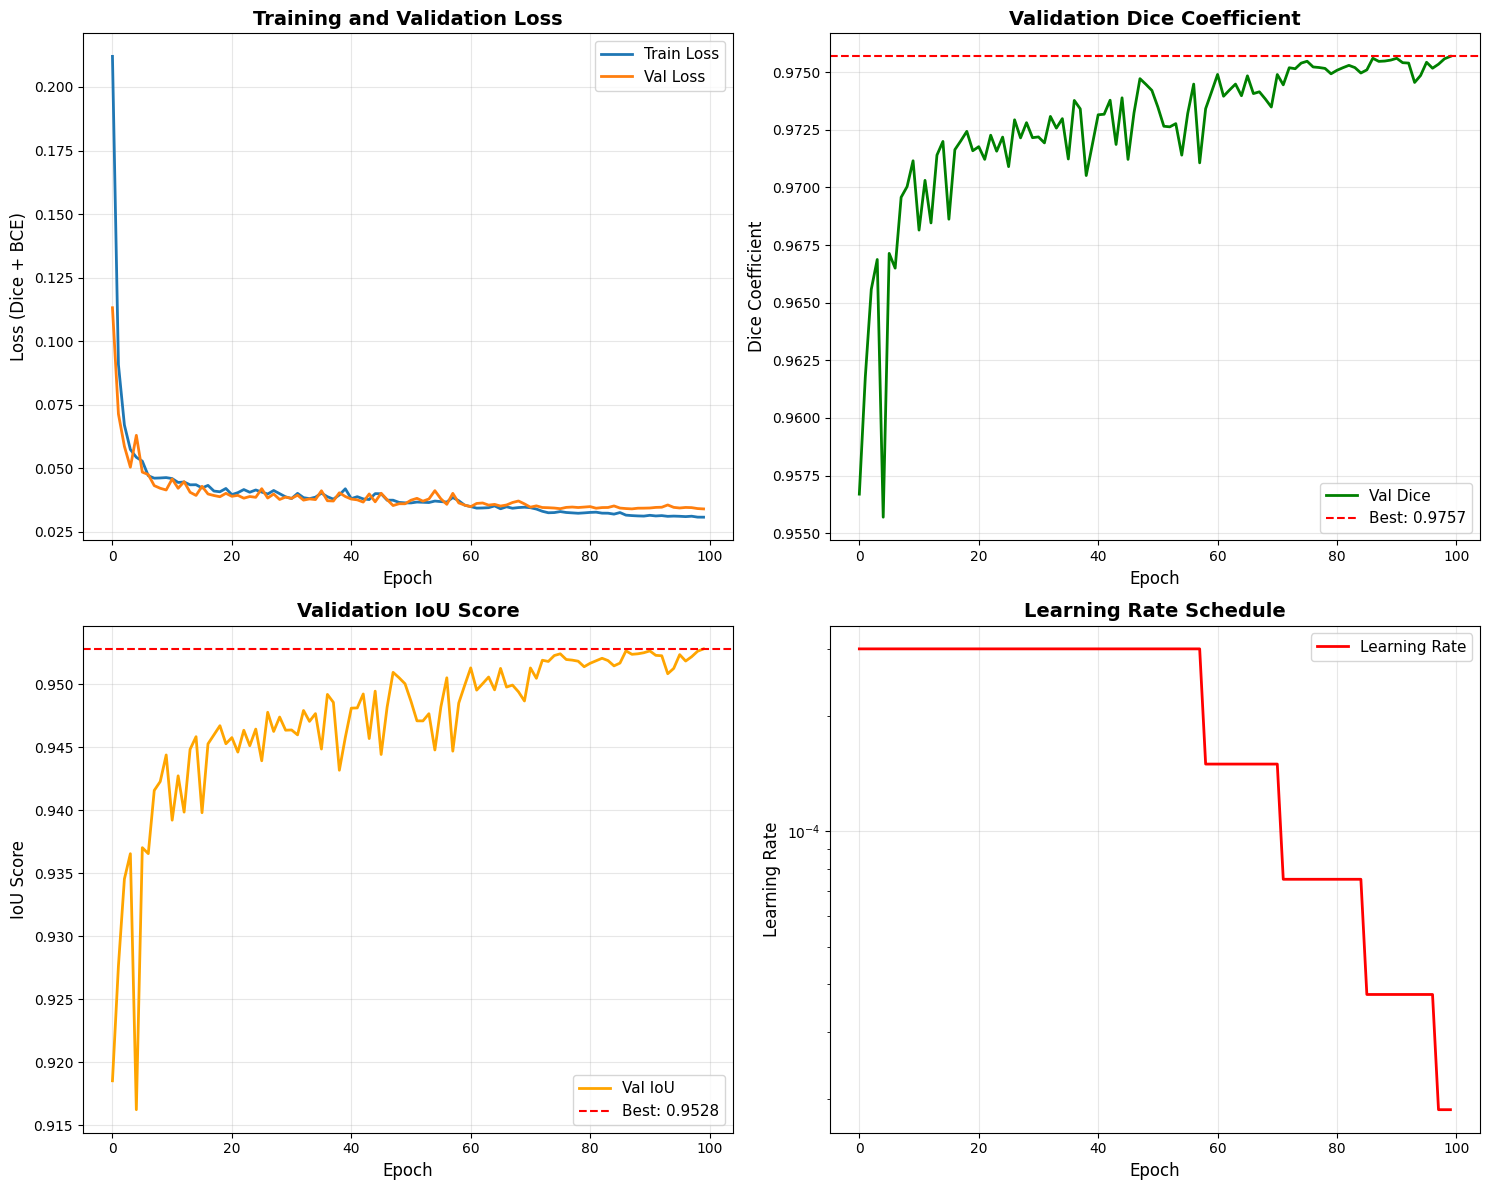

Training curves saved to /content/outputs/results/logs/training_curves.png


<Figure size 640x480 with 0 Axes>

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Loss curves
axes[0, 0].plot(history['train_loss'], label='Train Loss', linewidth=2)
axes[0, 0].plot(history['val_loss'], label='Val Loss', linewidth=2)
axes[0, 0].set_xlabel('Epoch', fontsize=12)
axes[0, 0].set_ylabel('Loss (Dice + BCE)', fontsize=12)
axes[0, 0].set_title('Training and Validation Loss', fontsize=14, fontweight='bold')
axes[0, 0].legend(fontsize=11)
axes[0, 0].grid(True, alpha=0.3)

# Dice coefficient
axes[0, 1].plot(history['val_dice'], label='Val Dice', color='green', linewidth=2)
axes[0, 1].axhline(y=best_dice, color='red', linestyle='--', label=f'Best: {best_dice:.4f}')
axes[0, 1].set_xlabel('Epoch', fontsize=12)
axes[0, 1].set_ylabel('Dice Coefficient', fontsize=12)
axes[0, 1].set_title('Validation Dice Coefficient', fontsize=14, fontweight='bold')
axes[0, 1].legend(fontsize=11)
axes[0, 1].grid(True, alpha=0.3)

# IoU
axes[1, 0].plot(history['val_iou'], label='Val IoU', color='orange', linewidth=2)
axes[1, 0].axhline(y=max(history['val_iou']), color='red', linestyle='--',
                   label=f"Best: {max(history['val_iou']):.4f}")
axes[1, 0].set_xlabel('Epoch', fontsize=12)
axes[1, 0].set_ylabel('IoU Score', fontsize=12)
axes[1, 0].set_title('Validation IoU Score', fontsize=14, fontweight='bold')
axes[1, 0].legend(fontsize=11)
axes[1, 0].grid(True, alpha=0.3)

# Learning rate
axes[1, 1].plot(history['lr'], label='Learning Rate', color='red', linewidth=2)
axes[1, 1].set_xlabel('Epoch', fontsize=12)
axes[1, 1].set_ylabel('Learning Rate', fontsize=12)
axes[1, 1].set_title('Learning Rate Schedule', fontsize=14, fontweight='bold')
axes[1, 1].legend(fontsize=11)
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_yscale('log')

plt.tight_layout()
plt.show()

# Save figure
log_dir = Path(get_path(config['logging']['log_dir']))
log_dir.mkdir(parents=True, exist_ok=True)
plt.savefig(log_dir / 'training_curves.png', dpi=150, bbox_inches='tight')
print(f"Training curves saved to {log_dir / 'training_curves.png'}")

## 10. Model Evaluation and Inference

### Test Set Evaluation with Best Model

**Objective:** Assess final model performance on held-out test set

---

#### Evaluation Workflow

1. **Load Best Checkpoint:**
   - Restore model weights from epoch with highest validation Dice
   - Set model to evaluation mode (`model.eval()`)
   - Display checkpoint metadata (epoch number, best Dice score)

2. **Generate Predictions:**
   - Forward pass on test batch: `logits = model(images)`
   - Convert logits to binary masks:
     - Apply sigmoid: `probs = torch.sigmoid(logits)` → probabilities [0, 1]
     - Threshold at 0.5: `preds = (probs > 0.5).float()` → binary {0, 1}

3. **Calculate Per-Sample Metrics:**
   - **Dice Coefficient:** Measures region overlap (2×|A∩B| / (|A|+|B|))
   - **IoU (Jaccard Index):** Measures segmentation accuracy (|A∩B| / |A∪B|)
   - **Pixel Accuracy:** Percentage of correctly classified pixels

4. **Visualize Results:**
   - Display 4 test samples in 3-column grid:
     - Column 1: Input ultrasound image (grayscale)
     - Column 2: Ground truth mask (binary)
     - Column 3: Model prediction + metrics overlay
   - Save visualization to `results/predictions/sample_predictions.png`

---

#### Interpretation Guide

**Visual Assessment:**
- ✓ **Smooth boundaries:** Model captures fetal head contour well
- ✓ **Minimal noise:** Clean segmentation (no scattered false positives)
- ⚠️ **Fragmented predictions:** Potential underfitting or poor data quality
- ⚠️ **Over-segmentation:** Model including surrounding structures

**Metric Ranges:**
- **Dice ≥ 0.97:** Excellent (state-of-the-art)
- **Dice 0.90-0.97:** Good (acceptable for clinical use)
- **Dice < 0.90:** Poor (needs model/data improvement)

**Common Issues:**
- Dice high, but visual mismatch → Check mask preprocessing
- Consistent under-segmentation → Adjust threshold (<0.5)
- Consistent over-segmentation → Adjust threshold (>0.5)

---

#### Output Files

**Generated Artifacts:**
1. `sample_predictions.png`: 4-sample visualization grid
2. Per-sample metrics (printed to console)
3. Visual comparison for qualitative assessment

---

#### Next Steps After Evaluation

1. **If performance is satisfactory (Dice ≥ 0.95):**
   - Download checkpoint for deployment (see Section 11)
   - Generate predictions on full test set
   - Calculate aggregate statistics

2. **If performance is suboptimal (Dice < 0.90):**
   - Analyze failure cases (which samples have low Dice?)
   - Check data quality (incorrect masks, artifacts)
   - Tune hyperparameters (learning rate, loss weights)
   - Try architectural modifications

Loaded best model from epoch 100
Best Dice Score: 0.9757


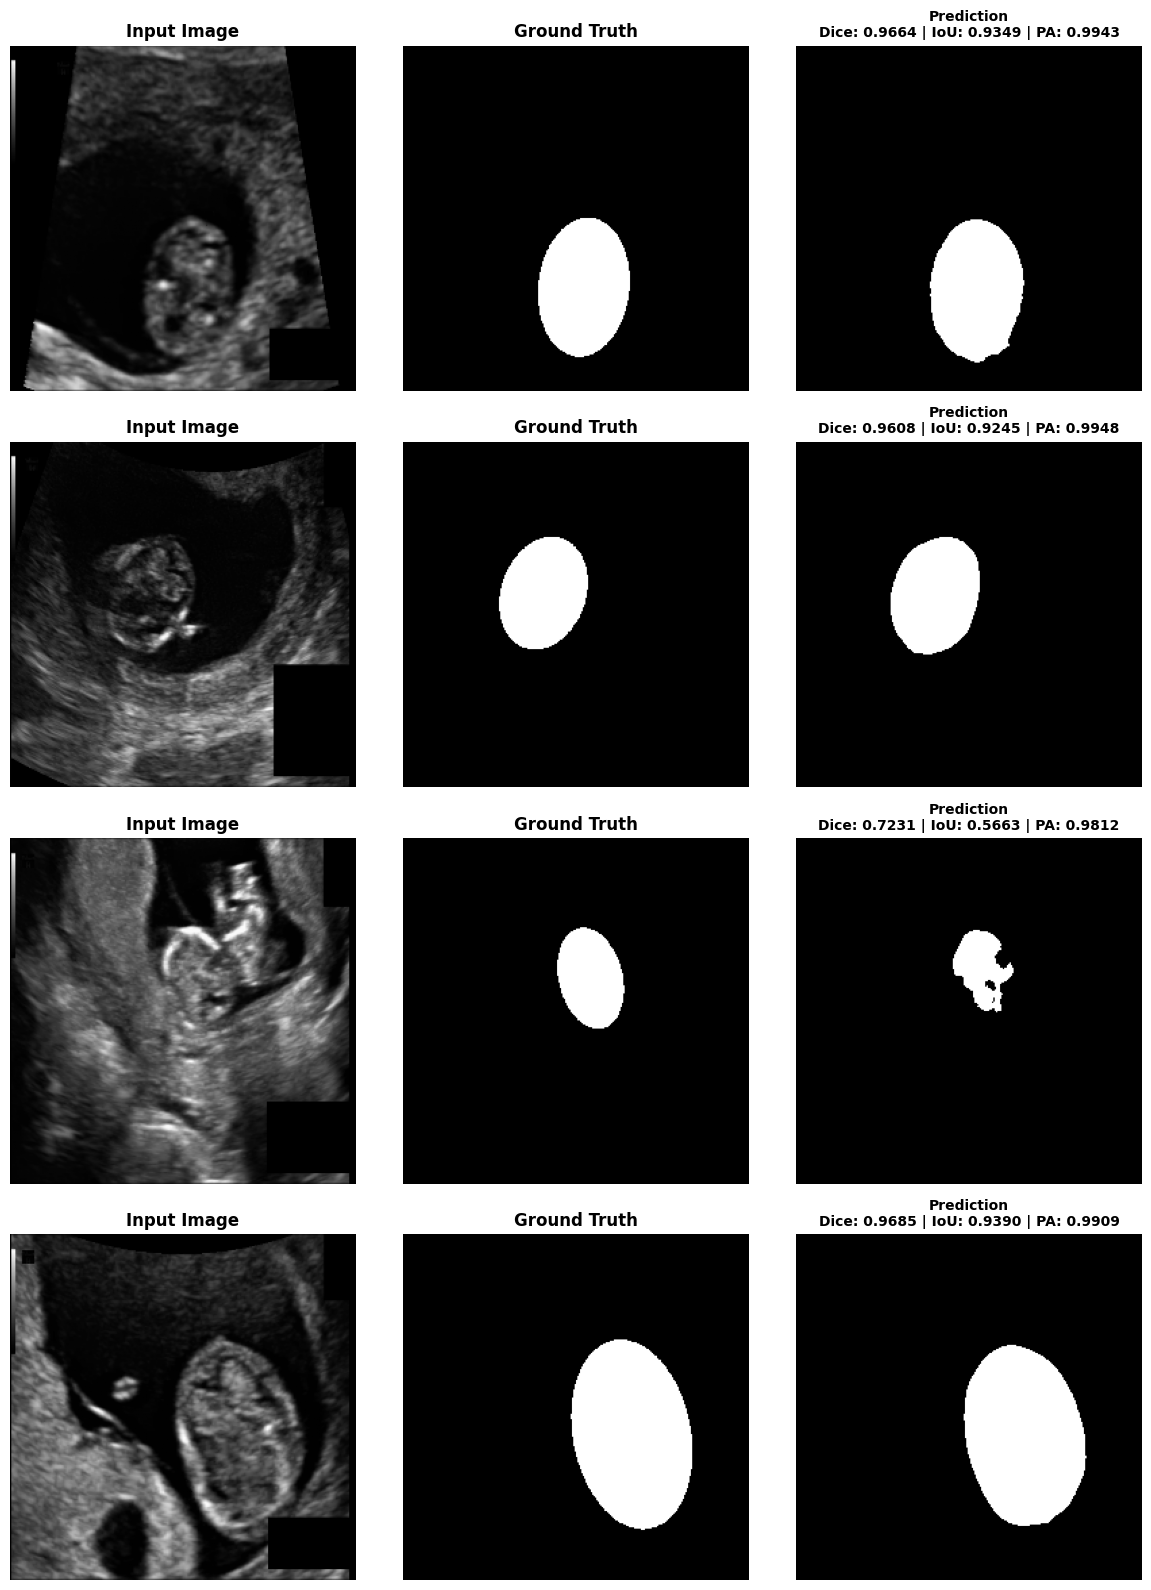

Sample predictions saved to /content/outputs/results/predictions/sample_predictions.png


In [ ]:
# Load best model
checkpoint_path = Path(get_path(config['logging']['checkpoint_dir'])) / 'best_model_mobinet_aspp_residual_se.pth'
checkpoint = torch.load(checkpoint_path, weights_only=False)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

print(f"Loaded best model from epoch {checkpoint['epoch']+1}")
print(f"Best Dice Score: {checkpoint['best_dice']:.4f}")

# Get test samples
test_images, test_masks = next(iter(test_loader))
test_images = test_images.to(device)

# Generate predictions
with torch.no_grad():
    # Model outputs raw logits - apply sigmoid to get probabilities
    test_logits = model(test_images)
    test_probs = torch.sigmoid(test_logits)  # Convert logits to [0, 1] probabilities
    test_preds = (test_probs > 0.5).float()  # Threshold at 0.5

# Visualize predictions
num_samples = min(4, len(test_images))
fig, axes = plt.subplots(num_samples, 3, figsize=(12, 4 * num_samples))

if num_samples == 1:
    axes = axes.reshape(1, -1)

for i in range(num_samples):
    # Move to CPU and convert to numpy
    img = test_images[i, 0].cpu().numpy()
    mask = test_masks[i, 0].numpy()
    pred = test_preds[i, 0].cpu().numpy()

    # Calculate metrics for this sample (ensure both tensors on same device)
    pred_tensor = test_preds[i].cpu()
    mask_tensor = test_masks[i].to(pred_tensor.device)
    dice = dice_coefficient(pred_tensor, mask_tensor).item()
    iou = iou_score(pred_tensor, mask_tensor).item()
    pa = pixel_accuracy(pred_tensor, mask_tensor)

    # Input image
    axes[i, 0].imshow(img, cmap='gray')
    axes[i, 0].set_title('Input Image', fontsize=12, fontweight='bold')
    axes[i, 0].axis('off')

    # Ground truth
    axes[i, 1].imshow(mask, cmap='gray')
    axes[i, 1].set_title('Ground Truth', fontsize=12, fontweight='bold')
    axes[i, 1].axis('off')

    # Prediction
    axes[i, 2].imshow(pred, cmap='gray')
    axes[i, 2].set_title(f'Prediction\nDice: {dice:.4f} | IoU: {iou:.4f} | PA: {pa:.4f}',
                         fontsize=10, fontweight='bold')
    axes[i, 2].axis('off')

plt.tight_layout()
plt.show()

# Save predictions
pred_dir = Path(get_path(config['logging']['prediction_dir']))
pred_dir.mkdir(parents=True, exist_ok=True)
save_prediction_grid(test_images[:4].cpu(), test_masks[:4], test_preds[:4].cpu(),
                    str(pred_dir / 'sample_predictions.png'), num_samples=4)
print(f"Sample predictions saved to {pred_dir / 'sample_predictions.png'}")

## 11. Download Results from Google Colab

### Export Training Artifacts

**Important:** Google Colab runtimes are temporary. Download all results before disconnecting.

#### Available Outputs

1. **Model Checkpoint** (`best_model_mobinet_aspp_residual_se.pth`)
   - Contains: Model weights, optimizer state, training history
   - Use for: Inference, transfer learning, deployment

2. **Training Curves** (`training_curves.png`)
   - Contains: Loss, Dice, IoU, learning rate plots
   - Use for: Performance analysis, thesis documentation

3. **Sample Predictions** (`sample_predictions.png`)
   - Contains: Visual comparison of 4 test samples
   - Use for: Qualitative assessment, presentations

#### Download Methods

**Method 1: Download Individual Files**
```python
from google.colab import files

# Download best model checkpoint
files.download('/content/outputs/results/checkpoints/best_model_mobinet_aspp_residual_se.pth')

# Download training curves
files.download('/content/outputs/results/logs/training_curves.png')

# Download sample predictions
files.download('/content/outputs/results/predictions/sample_predictions.png')
```

**Method 2: Download All Results as ZIP**
```python
# Create ZIP archive of all results
!cd /content/outputs && zip -r results.zip results/

# Download ZIP file
from google.colab import files
files.download('/content/outputs/results.zip')
```

**Method 3: Mount Google Drive (Automatic Backup)**
```python
from google.colab import drive
drive.mount('/content/drive')

# Copy results to Google Drive
!cp -r /content/outputs/results /content/drive/MyDrive/Fetal_Head_Segmentation_Results/
```

#### Runtime Warnings

⚠️ **Colab Free Tier Limitations:**
- 12-hour maximum runtime
- Runtime disconnects if idle for 90 minutes
- All `/content/` data is lost after disconnect

**Best Practice:** Download results immediately after training completes

In [ ]:
# Option 1: Download individual files (run each line separately)
from google.colab import files

print("Downloading model checkpoint...")
files.download('/content/outputs/results/checkpoints/best_model_mobinet_aspp_residual_se.pth')

print("Downloading training curves...")
files.download('/content/outputs/results/logs/training_curves.png')

print("Downloading sample predictions...")
files.download('/content/outputs/results/predictions/sample_predictions.png')

print("\n✓ All files downloaded successfully!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✓ All files downloaded successfully!


In [16]:
# Option 2: Download all results as a single ZIP archive
import os

print("Creating ZIP archive of all results...")
os.chdir('/content/outputs')
!zip -r results.zip results/

print("\nDownloading ZIP archive...")
from google.colab import files
files.download('/content/outputs/results.zip')

print("\n✓ Complete results archive downloaded!")

Creating ZIP archive of all results...
  adding: results/ (stored 0%)
  adding: results/predictions/ (stored 0%)
  adding: results/predictions/sample_predictions.png (deflated 5%)
  adding: results/checkpoints/ (stored 0%)
  adding: results/checkpoints/best_model_aspp_residual_se_unet.pth (deflated 41%)
  adding: results/logs/ (stored 0%)
  adding: results/logs/training_curves.png (deflated 95%)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✓ Complete results archive downloaded!


## 12. Training Summary and Next Steps

### Experiment Summary

**Model Architecture:** MobileNetV2-Based ASPP Residual SE U-Net

**Key Results:**
- Best Validation Dice: [Displayed after training]
- Best Validation IoU: [Displayed after training]
- Best Validation Pixel Accuracy: [Displayed after training]
- Total Training Time: [Varies by hardware]
- Final Model Size: ~11-13 MB (frozen encoder)

**Architecture Highlights:**
- Pre-trained MobileNetV2 encoder (ImageNet weights)
- ASPP bottleneck for multi-scale context
- SE blocks for channel attention
- ~70% parameters frozen (efficient training)

---

### Model Performance Checklist

**Excellent Performance (Ready for Deployment):**
- ✓ Validation Dice ≥ 0.97
- ✓ Validation IoU ≥ 0.95
- ✓ Visual predictions match ground truth closely
- ✓ Smooth segmentation boundaries
- ✓ Low false positive rate

**Good Performance (Acceptable with Minor Tuning):**
- ○ Validation Dice 0.90-0.97
- ○ Some boundary roughness
- ○ Occasional false positives in difficult cases

**Needs Improvement:**
- ✗ Validation Dice < 0.90
- ✗ Fragmented or over-segmented predictions
- ✗ Large train-validation gap (overfitting)

---

### Next Steps

#### 1. If Performance is Satisfactory (Dice ≥ 0.95)

**Deployment Tasks:**
- Download checkpoint for inference pipeline
- Test on external datasets (different ultrasound machines)
- Optimize for real-time inference (ONNX, TensorRT)
- Implement clinical validation protocol

**Analysis Tasks:**
- Generate predictions on full test set
- Calculate aggregate statistics (mean, std, min, max Dice)
- Analyze failure cases (which samples have low Dice?)
- Create ROC curves and other diagnostic plots

---

#### 2. If Performance Needs Improvement (Dice < 0.90)

**Data Quality:**
- Verify mask preprocessing (should be binary {0, 1})
- Check image-mask alignment
- Inspect samples with lowest Dice scores
- Consider data augmentation adjustments

**Hyperparameter Tuning:**
- Increase learning rate (try 5e-4 or 1e-3)
- Adjust loss weights (try 0.7 Dice / 0.3 BCE)
- Modify augmentation intensity
- Experiment with batch size

**Architecture Modifications:**
- Unfreeze encoder for fine-tuning (after initial training)
- Adjust SE reduction ratio (try 8 or 32)
- Modify ASPP atrous rates
- Add more decoder channels

---

#### 3. Comparative Analysis

**Benchmark Against Other Models:**
- Standard U-Net (baseline)
- Attention U-Net (attention mechanisms)
- Residual SE U-Net (without MobileNetV2)

**Metrics to Compare:**
- Dice coefficient, IoU, pixel accuracy
- Training time and convergence speed
- Model size and inference time
- Robustness to data variations

---

### Citation and Acknowledgment

**If using this implementation, please cite:**

```
@misc{fetal-head-segmentation,
  author = {Trinh Thai Son},
  title = {Fetal Head Segmentation using MobileNetV2-Based ASPP Residual SE U-Net},
  year = {2025},
  publisher = {GitHub},
  url = {https://github.com/TrinhThaiSonDHQT/Fetal-Head-Segmentation}
}
```

**Dataset Citation:**
```
@article{van2018automatic,
  title={Automatic fetal head detection and measurement in ultrasound images by iterative randomized Hough transform},
  author={Van Den Heuvel, Thomas LA and De Bruijn, Dagmar and De Korte, Chris L and Van Ginneken, Bram},
  journal={Ultrasound in medicine \& biology},
  volume={44},
  number={1},
  pages={1--11},
  year={2018},
  publisher={Elsevier}
}
```

---

### Contact and Support

**Project Repository:** https://github.com/TrinhThaiSonDHQT/Fetal-Head-Segmentation

**For Issues or Questions:**
- Open an issue on GitHub
- Check documentation in `/docs/` folder
- Review other model implementations in `/accuracy_focus/`

---

**🎉 Congratulations on completing the training! 🎉**